Saved image as turtle.jpg


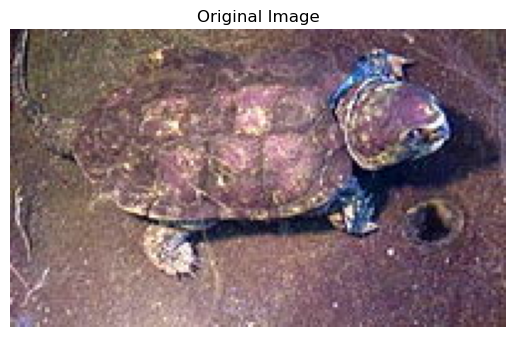

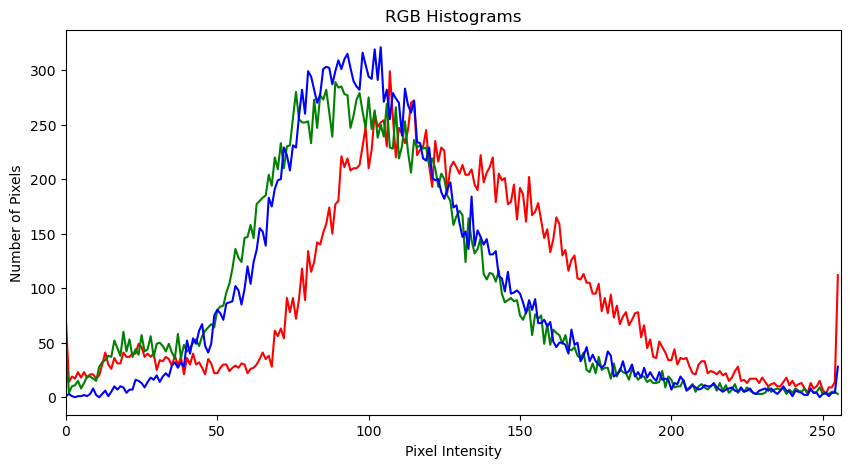

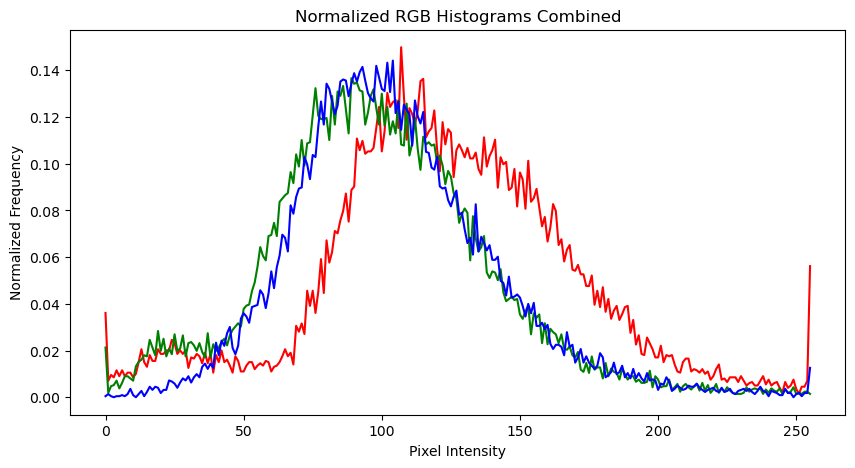

In [3]:
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

# URL of the turtle image
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Zolw_wielkoglowy.jpg/200px-Zolw_wielkoglowy.jpg"


resp = requests.get(url)
filename = "turtle.jpg"
with open(filename, 'wb') as f:
    f.write(resp.content)
print(f"Saved image as {filename}")

img_bgr = cv2.imread(filename)

# Convert to RGB for matplotlib
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Show the image
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Calculate histograms for R,G,B channels
colors = ('r', 'g', 'b')
plt.figure(figsize=(10,5))

for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0,256])

plt.title('RGB Histograms')
plt.xlabel('Pixel Intensity')
plt.ylabel('Number of Pixels')
plt.show()

# Normalize histograms and plot combined
plt.figure(figsize=(10,5))
for i, color in enumerate(colors):
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0,256])
    hist = cv2.normalize(hist, hist).flatten()
    plt.plot(hist, color=color)
plt.title('Normalized RGB Histograms Combined')
plt.xlabel('Pixel Intensity')
plt.ylabel('Normalized Frequency')
plt.show()

